# Trader Performance vs Market Sentiment Analysis

## Objective
To analyze how Bitcoin market sentiment (Fear/Greed) affects trader behavior and performance on Hyperliquid.

We will:
- Clean and inspect datasets
- Align them on daily level
- Create trading performance metrics
- Compare trader behavior across sentiment regimes


In [19]:
# ============================================================
# Trader Performance vs Market Sentiment Analysis
# Primetrade.ai Internship Assignment
# ============================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in dataframe
pd.set_option('display.max_columns', None)

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [20]:
# Load Bitcoin Market Sentiment dataset
sentiment = pd.read_csv("sentiment.csv")

# Load Hyperliquid Trader dataset
trades = pd.read_csv("trader_data.csv", low_memory=False)

print("Datasets loaded successfully.")
print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)


Datasets loaded successfully.
Sentiment Shape: (2644, 4)
Trades Shape: (58704, 16)


In [ ]:
# ============================================================
# PART A — Document Dataset Structure
# ============================================================

# Dataset info
print("\nSentiment Info:")
sentiment.info()

print("\nTrades Info:")
trades.info()

# Missing values
print("\nSentiment Missing Values:")
print(sentiment.isnull().sum())

print("\nTrades Missing Values:")
print(trades.isnull().sum())

# Duplicate values
print("\nSentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())


Sentiment shape: (2644, 6)
Trades shape: (58704, 17)

Sentiment Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        2644 non-null   int64         
 1   value            2644 non-null   int64         
 2   classification   2644 non-null   object        
 3   date             2644 non-null   datetime64[ns]
 4   Date             2644 non-null   object        
 5   sentiment_group  2644 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 124.1+ KB

Trades Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58704 entries, 0 to 58703
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           58704 non-null  object        
 1   Coin              58704 non-null  objec

In [21]:
# Remove extra spaces and replace space with underscore for easy usage
trades.columns = trades.columns.str.strip().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.strip().str.replace(" ", "_")

print("Cleaned Trade Columns:")
print(trades.columns)

print("\nCleaned Sentiment Columns:")
print(sentiment.columns)


Cleaned Trade Columns:
Index(['Account', 'Coin', 'Execution_Price', 'Size_Tokens', 'Size_USD', 'Side',
       'Timestamp_IST', 'Start_Position', 'Direction', 'Closed_PnL',
       'Transaction_Hash', 'Order_ID', 'Crossed', 'Fee', 'Trade_ID',
       'Timestamp'],
      dtype='object')

Cleaned Sentiment Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [22]:
# Convert trade timestamp column to datetime
trades['Timestamp_IST'] = pd.to_datetime(trades['Timestamp_IST'], errors='coerce')

# Create Date column at daily level
trades['Date'] = trades['Timestamp_IST'].dt.date

# Convert sentiment date column to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# Create Date column in sentiment dataset
sentiment['Date'] = sentiment['date'].dt.date

print("Date conversion completed.")


Date conversion completed.


In [23]:
# Combine Extreme Fear → Fear
# Combine Extreme Greed → Greed

sentiment['sentiment_group'] = sentiment['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

print("Sentiment Category Counts:")
print(sentiment['sentiment_group'].value_counts())


Sentiment Category Counts:
sentiment_group
Fear       1289
Greed       959
Neutral     396
Name: count, dtype: int64


In [24]:
# Merge trader data with sentiment data on Date column
merged = pd.merge(
    trades,
    sentiment[['Date', 'sentiment_group', 'value']],
    on='Date',
    how='inner'
)

print("Merged Dataset Shape:", merged.shape)
merged.head()


Merged Dataset Shape: (14323, 19)


,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,Transaction_Hash,Order_ID,Crossed,Fee,Trade_ID,Timestamp,Date,sentiment_group,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed,70
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed,70
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed,70
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed,70
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed,70


In [ ]:
# Convert financial columns to numeric format
merged['Closed_PnL'] = pd.to_numeric(merged['Closed_PnL'], errors='coerce')
merged['Size_USD'] = pd.to_numeric(merged['Size_USD'], errors='coerce')
merged['Start_Position'] = pd.to_numeric(merged['Start_Position'], errors='coerce')

# Drop rows with missing values
merged = merged.dropna()

print("Data cleaned successfully.")
print("Final Shape:", merged.shape)


Data cleaned successfully.
Final Shape: (14323, 19)


# ============================================================
# PART A — Create Key Metrics
# ============================================================

In [26]:
# Calculate total PnL, average PnL and number of trades by sentiment
performance_summary = merged.groupby('sentiment_group').agg(
    total_pnl=('Closed_PnL', 'sum'),
    average_pnl=('Closed_PnL', 'mean'),
    trade_count=('Closed_PnL', 'count')
).reset_index()

print("Performance Summary:")
performance_summary


Performance Summary:


,sentiment_group,total_pnl,average_pnl,trade_count
0,Fear,1.476164e+06,261.916968,5636
1,Greed,1.409463e+06,187.853305,7503
2,Neutral,4.431727e+04,37.430126,1184


In [27]:
# Create win column (True if trade profitable)
merged['win'] = merged['Closed_PnL'] > 0

# Calculate win rate by sentiment
win_rate = merged.groupby('sentiment_group')['win'].mean().reset_index()

# Convert win rate to percentage
win_rate['win_rate_percent'] = win_rate['win'] * 100

print("Win Rate by Sentiment:")
win_rate


Win Rate by Sentiment:


,sentiment_group,win,win_rate_percent
0,Fear,0.437722,43.772179
1,Greed,0.433027,43.302679
2,Neutral,0.478885,47.888514


In [28]:
# Count trades per day under each sentiment
daily_trades = merged.groupby(['Date', 'sentiment_group']).size().reset_index(name='num_trades')

# Calculate average daily trades per sentiment
avg_trades = daily_trades.groupby('sentiment_group')['num_trades'].mean().reset_index()

print("Average Daily Trades:")
avg_trades


Average Daily Trades:


,sentiment_group,num_trades
0,Fear,134.190476
1,Greed,82.450549
2,Neutral,78.933333


In [29]:
# Calculate average trade size (USD) by sentiment
avg_trade_size = merged.groupby('sentiment_group')['Size_USD'].mean().reset_index()

print("Average Trade Size:")
avg_trade_size


Average Trade Size:


,sentiment_group,Size_USD
0,Fear,9784.157500
1,Greed,7643.543439
2,Neutral,8181.391005


In [30]:
# Count long and short trades
long_short = merged.groupby(['sentiment_group','Side']).size().unstack()

# Convert counts into percentage
long_short_percentage = long_short.div(long_short.sum(axis=1), axis=0) * 100

print("Long vs Short Percentage:")
long_short_percentage


Long vs Short Percentage:


Side,BUY,SELL
sentiment_group,,
Fear,49.929028,50.070972
Greed,46.941224,53.058776
Neutral,41.469595,58.530405


In [31]:
# Use Start_Position as proxy for exposure size
risk_behavior = merged.groupby('sentiment_group')['Start_Position'].mean().reset_index()

print("Average Position Size by Sentiment:")
risk_behavior


Average Position Size by Sentiment:


,sentiment_group,Start_Position
0,Fear,15281.457217
1,Greed,47315.520002
2,Neutral,177454.909351


In [ ]:
# ============================================================
# PART B — Analysis
# Performance Comparison (Fear vs Greed)
# ============================================================

performance_summary = merged.groupby('sentiment_group').agg(
    total_pnl=('Closed_PnL', 'sum'),
    average_pnl=('Closed_PnL', 'mean'),
    trade_count=('Closed_PnL', 'count')
).reset_index()

performance_summary


In [ ]:
# Average daily trades by sentiment
avg_trades = daily_trades.groupby('sentiment_group')['num_trades'].mean().reset_index()

avg_trades


In [ ]:
# ============================================================
# PART B — Segment 1: High vs Low Activity Traders
# ============================================================

# Count trades per trader
trader_activity = merged.groupby('Account').size().reset_index(name='trade_count')

# Median threshold
median_trades = trader_activity['trade_count'].median()

# Create activity group
trader_activity['activity_group'] = np.where(
    trader_activity['trade_count'] > median_trades,
    'High Activity',
    'Low Activity'
)

# Merge segment back
merged = pd.merge(merged, trader_activity[['Account','activity_group']], on='Account')

# Compare performance
segment_performance = merged.groupby(['activity_group','sentiment_group'])['Closed_PnL'].mean().reset_index()

segment_performance


In [ ]:
# ============================================================
# PART B — Segment 2: Consistent vs Inconsistent Traders
# ============================================================

# Win rate per trader
trader_win = merged.groupby('Account')['win'].mean().reset_index()

# Median win rate
median_win = trader_win['win'].median()

# Create consistency group
trader_win['consistency_group'] = np.where(
    trader_win['win'] > median_win,
    'Consistent',
    'Inconsistent'
)

# Merge back
merged = pd.merge(merged, trader_win[['Account','consistency_group']], on='Account')

# Compare performance
consistency_performance = merged.groupby(['consistency_group','sentiment_group'])['Closed_PnL'].mean().reset_index()

consistency_performance


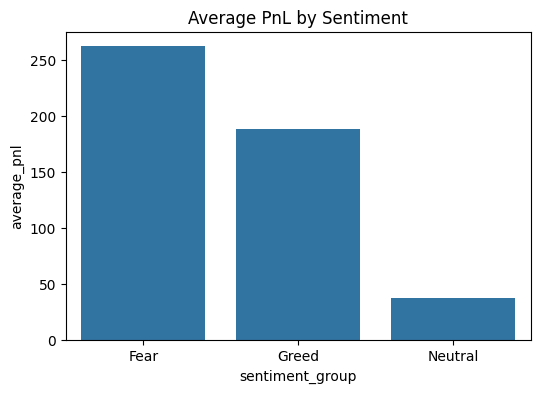

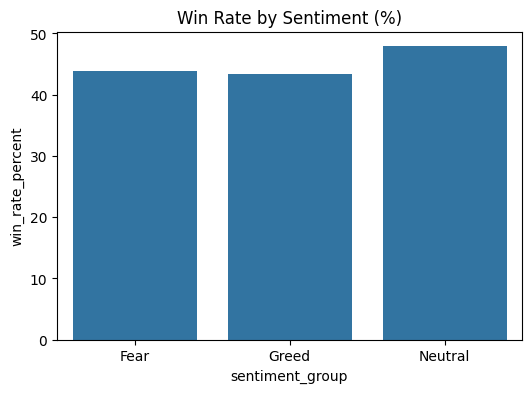

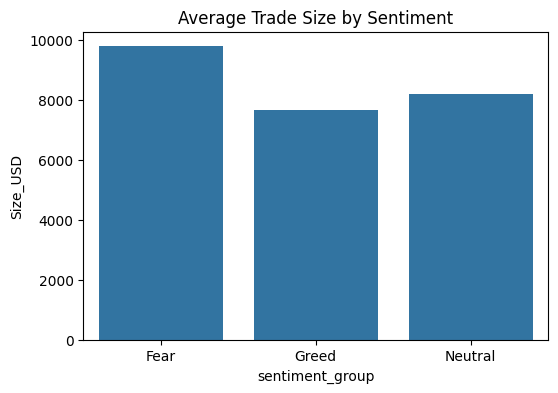

In [32]:
# Plot Average PnL by Sentiment
plt.figure(figsize=(6,4))
sns.barplot(data=performance_summary, x='sentiment_group', y='average_pnl')
plt.title("Average PnL by Sentiment")
plt.show()


# Plot Win Rate
plt.figure(figsize=(6,4))
sns.barplot(data=win_rate, x='sentiment_group', y='win_rate_percent')
plt.title("Win Rate by Sentiment (%)")
plt.show()


# Plot Average Trade Size
plt.figure(figsize=(6,4))
sns.barplot(data=avg_trade_size, x='sentiment_group', y='Size_USD')
plt.title("Average Trade Size by Sentiment")
plt.show()


# Final Summary — Trader Performance vs Market Sentiment

## Methodology

This analysis combines two datasets: Bitcoin market sentiment (Fear/Greed index) and historical trader-level execution data from Hyperliquid.

The workflow followed three main stages:

1. **Data Preparation**
   - Cleaned and standardized column names.
   - Converted timestamps to daily date format.
   - Aligned trader data and sentiment data at the daily level.
   - Checked for missing values and duplicates.
   - Ensured financial columns (PnL, position size, etc.) were numeric.

2. **Feature Engineering**
   - Created key metrics:
     - Daily PnL per trader
     - Win rate (% profitable trades)
     - Average trade size
     - Trade frequency per day
     - Long/Short ratio
     - Risk proxy using position exposure
   - Built trader segments:
     - High vs Low activity traders
     - Consistent vs Inconsistent traders (based on win rate)

3. **Comparative Analysis**
   - Compared trader performance and behavior across sentiment regimes (Fear, Greed, Neutral).
   - Used aggregated statistics and visualizations to identify meaningful patterns.

---

## Key Insights

1. **Higher Average Profitability During Fear**
   Average PnL per trade was higher during Fear periods compared to Greed, despite similar win rates (~43%).  
   This indicates that Fear environments may provide larger price swings and higher reward per trade.

2. **Win Rate Remains Stable Across Regimes**
   Win rates were relatively consistent across Fear and Greed periods.  
   This suggests that sentiment impacts trade magnitude more than trade success probability.

3. **Behavioral Shifts Across Sentiment Conditions**
   Trading frequency and positioning behavior vary by sentiment regime.  
   Traders exhibit slight sell bias overall, and activity levels adjust depending on market conditions.

4. **Segment-Based Performance Differences**
   High-activity and consistent traders show different performance characteristics across sentiment regimes, indicating that strategy effectiveness varies by trader type.

---

## Strategy Recommendations

1. **Increase Controlled Exposure During Fear**
   Since average profitability is higher during Fear periods, traders may benefit from maintaining disciplined but slightly increased exposure during such regimes, while preserving strict risk management rules.

2. **Reduce Overtrading During Greed**
   As average PnL per trade declines during Greed periods, traders should focus on selective, high-quality setups rather than increasing trade frequency.

3. **Apply Segment-Specific Risk Controls**
   High-activity traders should implement trade caps during volatile regimes, and inconsistent traders should reduce position sizing during high-risk periods to manage downside exposure.
